Image Alignment

In [1]:
#Importing Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

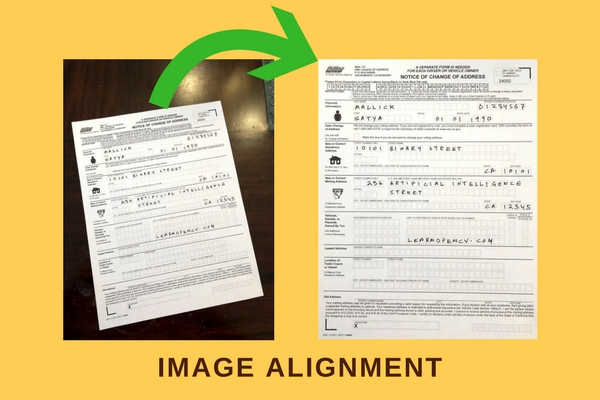

In [2]:
alignTemplate = cv2.imread("alignTmplt.jpg", cv2.IMREAD_COLOR)
alignTemplate = cv2.cvtColor(alignTemplate, cv2.COLOR_BGR2RGB)

Image(filename = "alignTmplt.jpg")

Theory

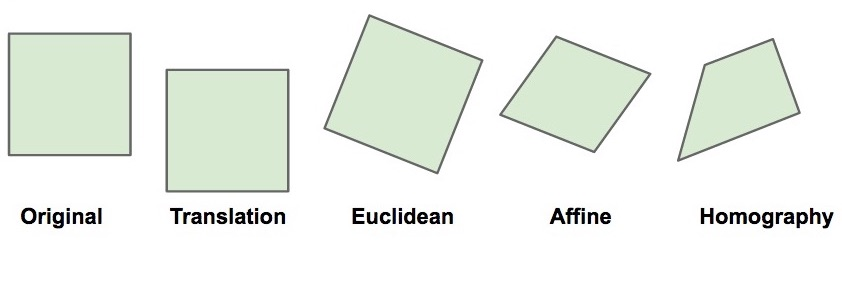

In [3]:
theory = cv2.imread("theory.jpg", cv2.IMREAD_COLOR)
theory = cv2.cvtColor(alignTemplate, cv2.COLOR_BGR2RGB)

Image(filename = "theory.jpg")

Theory Homography

In [4]:
#Images of two planes are related by a Homography
#We need 4 corresponding points to estimate Homography

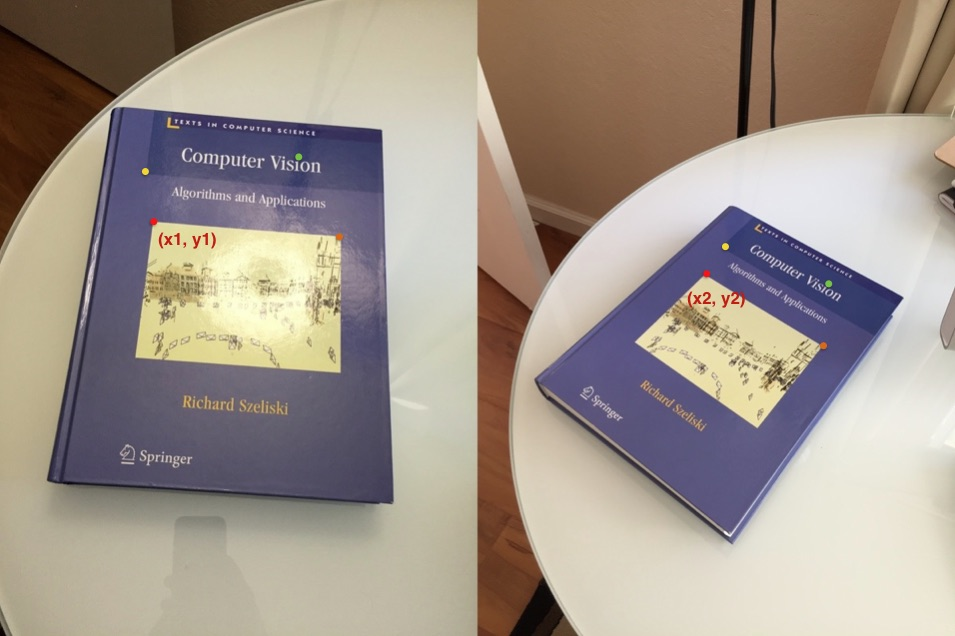

In [5]:
homoGtheory = cv2.imread("theory.jpg", cv2.IMREAD_COLOR)
homoGtheory = cv2.cvtColor(alignTemplate, cv2.COLOR_BGR2RGB)

Image(filename = "homoGtheory.jpg")

In [6]:
#Step 1 --> Read Template and Scanned Image

#Read reference image
OriginalForm = "originalForm.png"
print("Reading reference image:", OriginalForm)
OriginalFormImage = cv2.imread(OriginalForm, cv2.IMREAD_COLOR)
OriginalFormImage = cv2.cvtColor(OriginalFormImage, cv2.COLOR_BGR2RGB)

#Read image to be aligned
ScannedForm = "scannedForm.png"
print("Reading image to align:", ScannedForm)
ScannedFormImage = cv2.imread(ScannedForm, cv2.IMREAD_COLOR)
ScannedFormImage = cv2.cvtColor(ScannedFormImage, cv2.COLOR_BGR2RGB)

Reading reference image: originalForm.png
Reading image to align: scannedForm.png


Text(0.5, 1.0, 'Scanned Form')

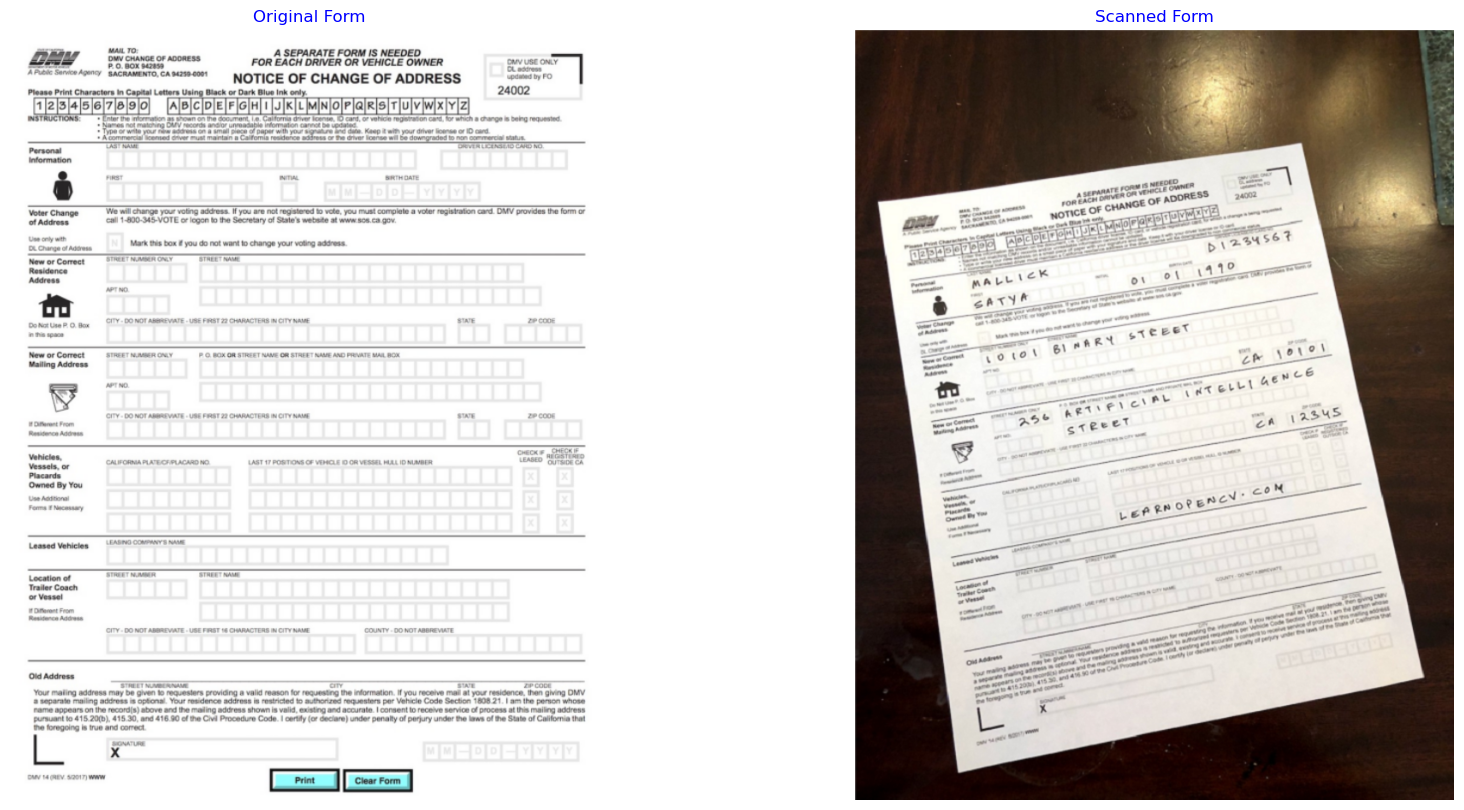

In [7]:
#Ploting Images

plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.imshow(OriginalFormImage)
plt.axis("off")
plt.title("Original Form", color = "blue")

plt.subplot(122)
plt.imshow(ScannedFormImage)
plt.axis("off")
plt.title("Scanned Form", color = "blue")

Find Key Point in Both Images

In [15]:
#Convert Image to GrayScale
OriginalFormImage_gray = cv2.cvtColor(OriginalFormImage, cv2.COLOR_BGR2GRAY)
ScannedFormImage_gray = cv2.cvtColor(ScannedFormImage, cv2.COLOR_BGR2GRAY)

#Detect ORB Features and Compute Descriptors
#Oriented FAST and Rotated BRIEF. it is a good alternative to SIFT and SURF in computation cost
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

#keyPoints are Egde, Corner
#descriptors are pixel of Corners, describe the location, Size, Scale and Orientation of the keyPoints.
#descriptors are vector representation of the pixel Information of the keyPoints that matches both images
keypoints1, descriptors1 = orb.detectAndCompute(OriginalFormImage_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(ScannedFormImage_gray, None)

#View
OriginalForm_display = cv2.drawKeypoints(OriginalFormImage,
                                         keypoints1,
                                         outImage = np.array([]),
                                         color = (255, 0, 0),
                                         flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

ScannedForm_display = cv2.drawKeypoints(ScannedFormImage,
                                         keypoints2,
                                         outImage = np.array([]),
                                         color = (255, 0, 0),
                                         flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Scanned Form')

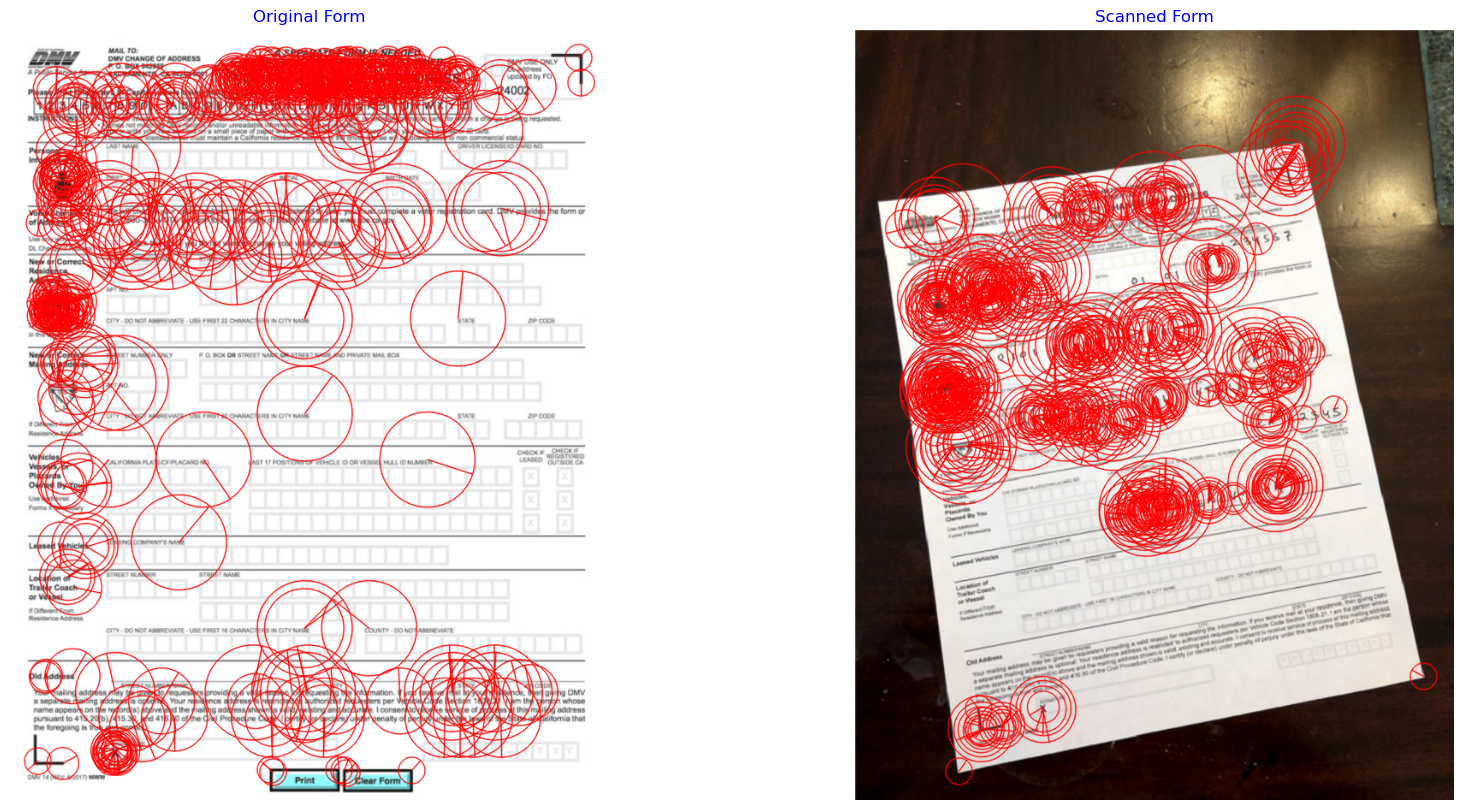

In [16]:
#Ploting Images

plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.imshow(OriginalForm_display)
plt.axis("off")
plt.title("Original Form", color = "blue")

plt.subplot(122)
plt.imshow(ScannedForm_display)
plt.axis("off")
plt.title("Scanned Form", color = "blue")

In [17]:
#We've calculated the kepoints and descriptors of both images Where all the --> 
#Red circles represents keypoints
#The center of the circle represents the location of the keypoints
#The size of the circle represents the scale of the keypoints
#The line connected from the center of the circle to outside of the circle represents the orientation of the keypoints

Match Keypoints in the Two Images

In [18]:
#Match Features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
#Converting to List for Sorting as Tuples are Immutable Objects
matches = list(matcher.match(descriptors1, descriptors2, None))

#Sort Matches by Score
matches.sort(key = lambda x: x.distance, reverse = False)

#Remove not so Good Matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

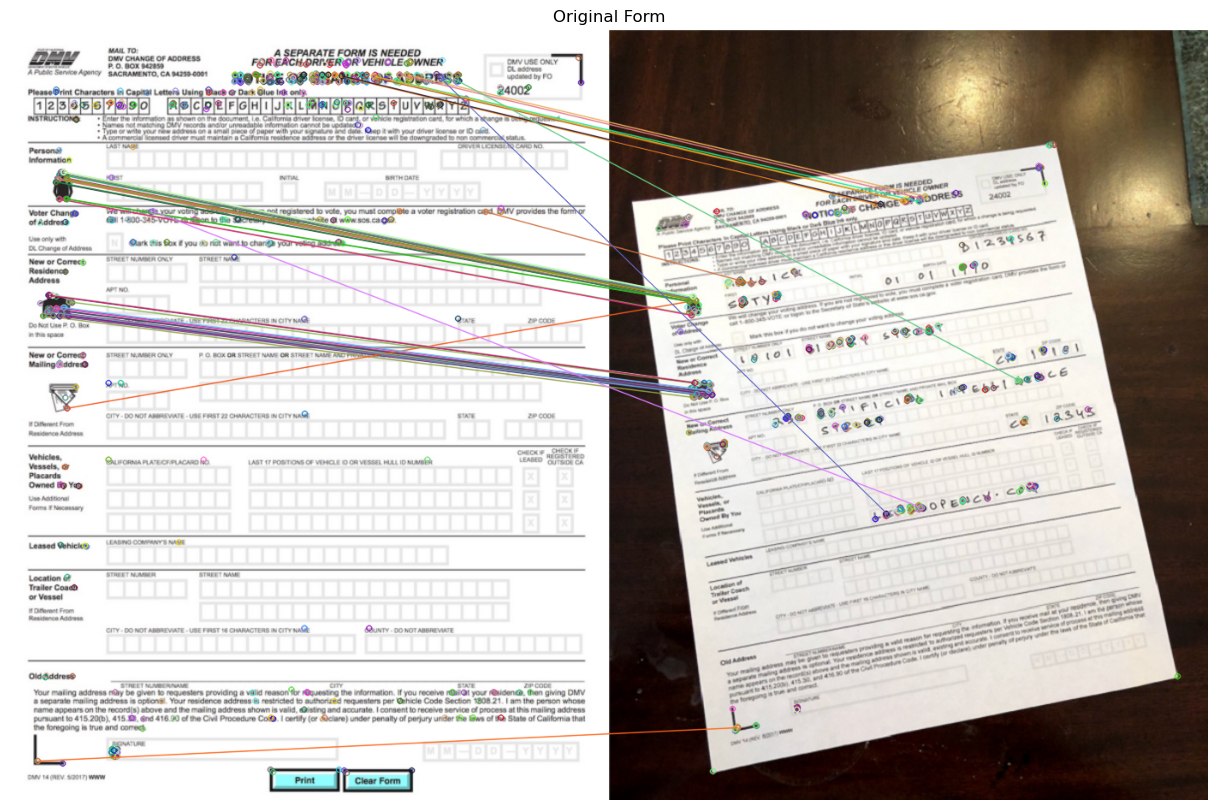

In [19]:
#Draw Top Matches
img_matches = cv2.drawMatches(OriginalFormImage, keypoints1, ScannedFormImage, keypoints2, matches, None)

#view
plt.figure(figsize = (40, 10))
plt.imshow(img_matches)
plt.axis("off")
plt.title("Original Form")

Find Homography

In [20]:
#Extract Location of Good Matches
points1 = np.zeros((len(matches), 2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
    
#Find HomoGraphy
h, mask  = cv2.findHomography(points2, points1, cv2.RANSAC)

Wrap Image

Text(0.5, 1.0, 'Scanned Form')

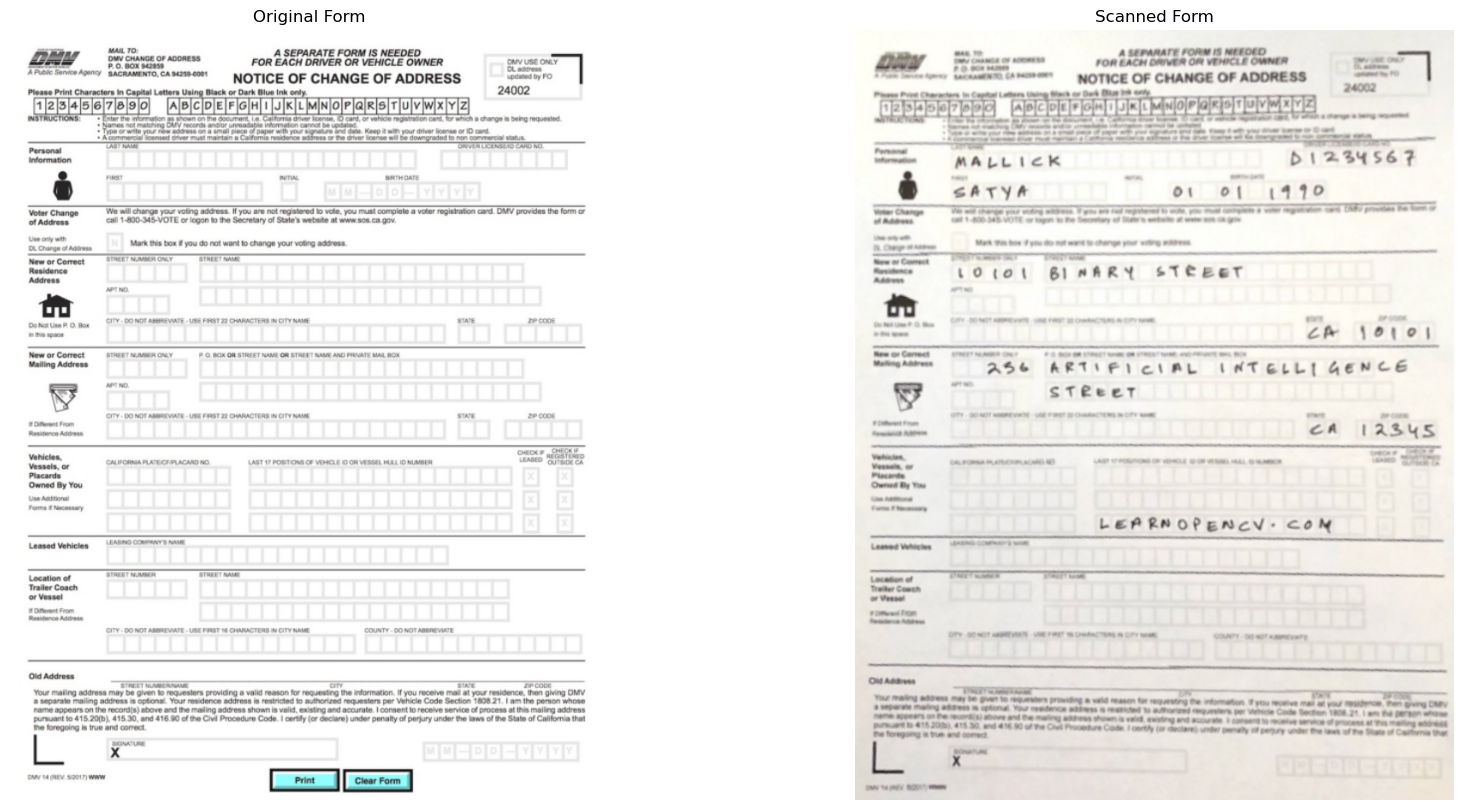

In [21]:
height, width, channels = OriginalFormImage.shape
ScannedFormImage_reg = cv2.warpPerspective(ScannedFormImage, h, (width, height))

#Display Results
plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.imshow(OriginalFormImage)
plt.axis("off")
plt.title("Original Form")

plt.subplot(122)
plt.imshow(ScannedFormImage_reg)
plt.axis("off")
plt.title("Scanned Form")